In [8]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [9]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [10]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [13]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "Exxon mobil"
noOfTweet = int('600')


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1


positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  261
negative number:  105
neutral number:  234


In [15]:
tweet_list


,0
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...
1,RT @Ambrosia_Ijebu: Sauces say this sale is cl...
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci..."
3,RT @Ambrosia_Ijebu: Sauces say this sale is cl...
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...
...,...
595,"@JayEllisAgain Home Depot, Chick Fil a, Hobby ..."
596,@kerpen @CoryBooker More pro-corporate framing...
597,Exxon Mobil says it raised its estimate of the...
598,Exxon Mobil raises Stabroek resource estimate ...


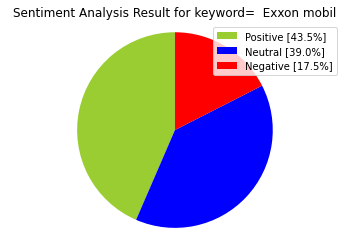

In [16]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [17]:
tweet_list.drop_duplicates(inplace = True)


In [18]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...,RT @Ambrosia_Ijebu: Sauces say this sale is cl...
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci...","RT @AdCapArg: #petroleo y #cedears:\n""Las opci..."
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...,RT @LateNighter5: @exxonmobil @Porsche Exxon M...
5,Exxon Mobil (XOM) Downgraded by BNP Paribas to...,Exxon Mobil (XOM) Downgraded by BNP Paribas to...
6,"#petroleo y #cedears:\n""Las opciones que vemos...","#petroleo y #cedears:\n""Las opciones que vemos..."
...,...,...
595,"@JayEllisAgain Home Depot, Chick Fil a, Hobby ...","@JayEllisAgain Home Depot, Chick Fil a, Hobby ..."
596,@kerpen @CoryBooker More pro-corporate framing...,@kerpen @CoryBooker More pro-corporate framing...
597,Exxon Mobil says it raised its estimate of the...,Exxon Mobil says it raised its estimate of the...
598,Exxon Mobil raises Stabroek resource estimate ...,Exxon Mobil raises Stabroek resource estimate ...


In [19]:
tweet_list

,0,text
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...,RT @Ambrosia_Ijebu: Sauces say this sale is cl...
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci...","RT @AdCapArg: #petroleo y #cedears:\n""Las opci..."
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...,RT @LateNighter5: @exxonmobil @Porsche Exxon M...
5,Exxon Mobil (XOM) Downgraded by BNP Paribas to...,Exxon Mobil (XOM) Downgraded by BNP Paribas to...
6,"#petroleo y #cedears:\n""Las opciones que vemos...","#petroleo y #cedears:\n""Las opciones que vemos..."
...,...,...
595,"@JayEllisAgain Home Depot, Chick Fil a, Hobby ...","@JayEllisAgain Home Depot, Chick Fil a, Hobby ..."
596,@kerpen @CoryBooker More pro-corporate framing...,@kerpen @CoryBooker More pro-corporate framing...
597,Exxon Mobil says it raised its estimate of the...,Exxon Mobil says it raised its estimate of the...
598,Exxon Mobil raises Stabroek resource estimate ...,Exxon Mobil raises Stabroek resource estimate ...


In [20]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...,sauces say this sale is close to being done ...
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci...",petroleo y cedears las opciones que vemos...
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...,exxon mobil shell bp and all oil majors...
5,Exxon Mobil (XOM) Downgraded by BNP Paribas to...,exxon mobil xom downgraded by bnp paribas to...
6,"#petroleo y #cedears:\n""Las opciones que vemos...",petroleo y cedears las opciones que vemos ...
7,RT @FrklnwRu1: @dev_decker feels like big Phar...,decker feels like big pharma and exxon mobi...
8,Exxon Mobil Corp. (XOM) surprised the market w...,exxon mobil corp xom surprised the market w...
9,Exxon Mobil (XOM) Downgraded by Exane BNP Pari...,exxon mobil xom downgraded by exane bnp pari...
11,Found on web: \n\nThe Economy is so bad that\n...,found on web the economy is so bad that my...
12,Hope @RepKatiePorter can finger paint climate ...,hope can finger paint climate catastrophe in...


In [21]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...,sauces say this sale is close to being done ...,0.0,0.000000,positive,0.000,0.894,0.106,0.3612
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci...",petroleo y cedears las opciones que vemos...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...,exxon mobil shell bp and all oil majors...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,Exxon Mobil (XOM) Downgraded by BNP Paribas to...,exxon mobil xom downgraded by bnp paribas to...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
6,"#petroleo y #cedears:\n""Las opciones que vemos...",petroleo y cedears las opciones que vemos ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @FrklnwRu1: @dev_decker feels like big Phar...,decker feels like big pharma and exxon mobi...,0.0,0.100000,positive,0.000,0.800,0.200,0.3612
8,Exxon Mobil Corp. (XOM) surprised the market w...,exxon mobil corp xom surprised the market w...,0.1,0.900000,positive,0.000,0.909,0.091,0.2263
9,Exxon Mobil (XOM) Downgraded by Exane BNP Pari...,exxon mobil xom downgraded by exane bnp pari...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
11,Found on web: \n\nThe Economy is so bad that\n...,found on web the economy is so bad that my...,-0.7,0.666667,negative,0.172,0.728,0.100,-0.4388
12,Hope @RepKatiePorter can finger paint climate ...,hope can finger paint climate catastrophe in...,0.7,0.600000,positive,0.168,0.611,0.221,0.1027


In [22]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [23]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [24]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,195,42.03
neutral,178,38.36
negative,91,19.61


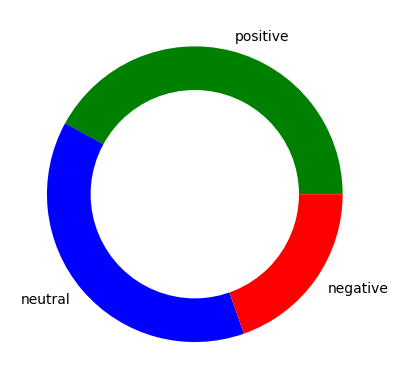

In [25]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [26]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [27]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,102.04
neutral,91.22
positive,104.46


In [29]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,16.71
neutral,14.43
positive,17.24


In [30]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [31]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [32]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [33]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [34]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [35]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Ambrosia_Ijebu: Sauces say this sale is cl...,sauces say this sale is close to being done ...,0.0,0.0,positive,0.0,0.894,0.106,0.3612,121,22,sauces say this sale is close to being done ...,"[, sauces, say, this, sale, is, close, to, bei...","[, sauces, say, sale, close, done, exit, onsho...","[, sauc, say, sale, close, done, exit, onshor,..."
2,"RT @AdCapArg: #petroleo y #cedears:\n""Las opci...",petroleo y cedears las opciones que vemos...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,127,19,petroleo y cedears las opciones que vemos...,"[, petroleo, y, cedears, las, opciones, que, v...","[, petroleo, cedears, las, opciones, que, vemo...","[, petroleo, cedear, la, opcion, que, vemo, co..."
4,RT @LateNighter5: @exxonmobil @Porsche Exxon M...,exxon mobil shell bp and all oil majors...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,106,19,exxon mobil shell bp and all oil majors...,"[, exxon, mobil, shell, bp, and, all, oil, maj...","[, exxon, mobil, shell, bp, oil, majors, knew,...","[, exxon, mobil, shell, bp, oil, major, knew, ..."
5,Exxon Mobil (XOM) Downgraded by BNP Paribas to...,exxon mobil xom downgraded by bnp paribas to...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,65,9,exxon mobil xom downgraded by bnp paribas to...,"[exxon, mobil, xom, downgraded, by, bnp, parib...","[exxon, mobil, xom, downgraded, bnp, paribas, ...","[exxon, mobil, xom, downgrad, bnp, pariba, und..."
6,"#petroleo y #cedears:\n""Las opciones que vemos...",petroleo y cedears las opciones que vemos ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,118,16,petroleo y cedears las opciones que vemos ...,"[, petroleo, y, cedears, las, opciones, que, v...","[, petroleo, cedears, las, opciones, que, vemo...","[, petroleo, cedear, la, opcion, que, vemo, co..."


In [36]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

464 Number of reviews has 1513 words


In [37]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaa,ab,abbv,abbvi,abet,absoluto,absurd,abt,access,...,year,yield,yla,yo,yoy,yup,zamanki,zaro,zombi,zum
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
exxon,372
mobil,327
xom,122
corp,81
market,70
chang,64
q,61
amp,60
rate,60
result,55


In [39]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('exxon mobil', 316),
 ('mobil corp', 78),
 ('corp xom', 63),
 ('xom surprised', 55),
 ('surprised market', 55),
 ('changed rating', 55),
 ('mobil amp', 19),
 ('en el', 19),
 ('exxon mob', 18),
 ('research reports', 18),
 ('reports roche', 18),
 ('roche exxon', 18),
 ('amp honeywell', 17),
 ('rating hold', 16),
 ('market q3', 15),
 ('q3 result', 15),
 ('hold exxon', 15),
 ('market q1', 15),
 ('q1 result', 15),
 ('result goldman', 15)]

In [41]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('exxon mobil corp', 78),
 ('mobil corp xom', 63),
 ('corp xom surprised', 55),
 ('xom surprised market', 55),
 ('exxon mobil amp', 19),
 ('research reports roche', 18),
 ('reports roche exxon', 18),
 ('roche exxon mobil', 18),
 ('mobil amp honeywell', 17),
 ('changed rating hold', 16),
 ('surprised market q3', 15),
 ('market q3 result', 15),
 ('rating hold exxon', 15),
 ('surprised market q1', 15),
 ('market q1 result', 15),
 ('result goldman sachs', 15),
 ('goldman sachs changed', 15),
 ('sachs changed rating', 15),
 ('surprised market q4', 14),
 ('market q4 result', 14)]

In [42]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [47]:
XOM = yf.download("XOM", start="2021-10-11", end="2021-10-12", interval = "1h")
XOM

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,63.029999,63.060001,62.275002,62.669998,62.669998,6944360
2021-10-11 10:30:00-04:00,62.669998,62.794998,62.500000,62.750000,62.750000,2832816
2021-10-11 11:30:00-04:00,62.750000,62.830002,62.360001,62.430000,62.430000,2353269
2021-10-11 12:30:00-04:00,62.422699,62.450001,61.654999,61.709999,61.709999,3074245
2021-10-11 13:30:00-04:00,61.720001,61.869999,61.599998,61.660000,61.660000,2028157
2021-10-11 14:30:00-04:00,61.660000,61.950001,61.544998,61.880001,61.880001,1421574
2021-10-11 15:30:00-04:00,61.875000,61.935001,61.549999,61.560001,61.560001,2201393


<AxesSubplot:>

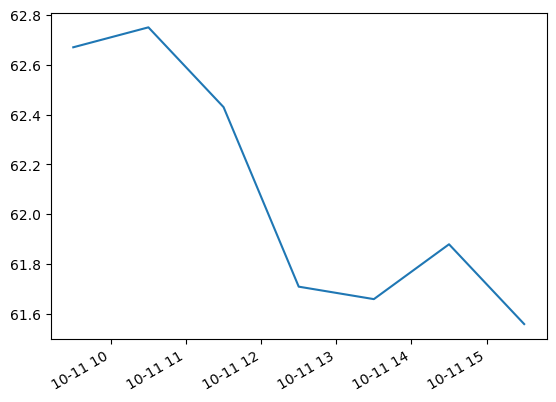

In [48]:
XOM['Adj Close'].plot()